In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-airline-flight-routes-and-fares-1993-2024/US Airline Flight Routes and Fares 1993-2024.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('/kaggle/input/us-airline-flight-routes-and-fares-1993-2024/US Airline Flight Routes and Fares 1993-2024.csv')
df.head()

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX


In [4]:
df.iloc[:,:15]

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,PIE,970,180,81.43,G4
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,TPA,970,19,208.93,DL
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,DAL,580,204,184.56,WN
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,DFW,580,264,182.64,AA
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,PHX,328,398,177.11,WN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245950,Table1a,2024,1,35412,31703,"Knoxville, TN","New York City, NY (Metropolitan Area)",15412,12953,TYS,LGA,665,207,278.70,DL
245951,Table1a,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,11697,TYS,FLL,724,277,148.69,G4
245952,Table1a,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,13303,TYS,MIA,724,70,330.19,AA
245953,Table1a,2024,1,35412,33195,"Knoxville, TN","Tampa, FL (Metropolitan Area)",15412,14112,TYS,PIE,550,178,95.65,G4


In [5]:
df.dtypes

tbl                object
Year                int64
quarter             int64
citymarketid_1      int64
citymarketid_2      int64
city1              object
city2              object
airportid_1         int64
airportid_2         int64
airport_1          object
airport_2          object
nsmiles             int64
passengers          int64
fare              float64
carrier_lg         object
large_ms          float64
fare_lg           float64
carrier_low        object
lf_ms             float64
fare_low          float64
Geocoded_City1     object
Geocoded_City2     object
tbl1apk            object
dtype: object

In [6]:
df.isnull().mean()*100

tbl                0.000000
Year               0.000000
quarter            0.000000
citymarketid_1     0.000000
citymarketid_2     0.000000
city1              0.000000
city2              0.000000
airportid_1        0.000000
airportid_2        0.000000
airport_1          0.000000
airport_2          0.000000
nsmiles            0.000000
passengers         0.000000
fare               0.000000
carrier_lg         0.626131
large_ms           0.626131
fare_lg            0.626131
carrier_low        0.655404
lf_ms              0.655404
fare_low           0.655404
Geocoded_City1    15.940314
Geocoded_City2    15.940314
tbl1apk            0.000000
dtype: float64

In [7]:
df.describe()

,Year,quarter,citymarketid_1,citymarketid_2,airportid_1,airportid_2,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low
count,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,244415.000000,244415.000000,244343.000000,244343.000000
mean,2008.524124,2.479153,31556.430201,32180.117086,12437.099986,13249.889525,1189.812319,299.476795,218.979587,0.665252,218.710963,0.450438,190.675939
std,8.703364,1.122149,1089.872880,1232.464184,1431.665257,1425.810159,703.143472,511.389486,82.372486,0.224635,84.674363,0.332669,73.577694
min,1993.000000,1.000000,30135.000000,30189.000000,10135.000000,10466.000000,109.000000,0.000000,50.000000,0.003800,50.000000,0.010000,50.000000
25%,2001.000000,1.000000,30721.000000,30994.000000,11193.000000,12197.000000,626.000000,21.000000,164.620000,0.480000,161.500000,0.158000,140.060000
50%,2008.000000,2.000000,31423.000000,32211.000000,12266.000000,13303.000000,1023.000000,113.000000,209.320000,0.652400,208.030000,0.360000,181.630000
75%,2016.000000,3.000000,32467.000000,33192.000000,13487.000000,14679.000000,1736.000000,339.000000,262.890000,0.871900,263.640000,0.750000,230.040000
max,2024.000000,4.000000,35412.000000,35628.000000,16440.000000,15919.000000,2724.000000,8301.000000,3377.000000,1.000000,2725.600000,1.000000,2725.600000


In [8]:
df.corr(numeric_only=True)

,Year,quarter,citymarketid_1,citymarketid_2,airportid_1,airportid_2,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low
Year,1.000000,0.006125,-0.000373,-0.007119,-0.009018,-0.016622,0.018843,0.086214,0.151058,0.105231,0.154496,0.102918,0.174297
quarter,0.006125,1.000000,0.000384,0.003282,0.000650,0.000613,0.000205,0.016498,-0.026186,-0.000968,-0.024517,-0.000426,-0.015940
citymarketid_1,-0.000373,0.000384,1.000000,0.007237,0.526658,0.061771,0.104284,-0.043699,0.044420,-0.119061,0.036973,-0.056508,0.033375
citymarketid_2,-0.007119,0.003282,0.007237,1.000000,0.043398,0.537673,0.091133,-0.090974,0.014113,-0.024305,0.009706,0.021699,0.029288
airportid_1,-0.009018,0.000650,0.526658,0.043398,1.000000,0.067267,0.090738,-0.015663,0.035840,-0.104327,0.026997,-0.036139,0.038183
airportid_2,-0.016622,0.000613,0.061771,0.537673,0.067267,1.000000,0.182279,-0.017792,0.053326,-0.084999,0.046269,-0.021996,0.056120
nsmiles,0.018843,0.000205,0.104284,0.091133,0.090738,0.182279,1.000000,-0.079008,0.500407,-0.400557,0.483488,-0.252953,0.416711
passengers,0.086214,0.016498,-0.043699,-0.090974,-0.015663,-0.017792,-0.079008,1.000000,-0.171460,-0.077901,-0.126955,-0.123004,-0.205293
fare,0.151058,-0.026186,0.044420,0.014113,0.035840,0.053326,0.500407,-0.171460,1.000000,-0.182312,0.955984,-0.188844,0.874653
large_ms,0.105231,-0.000968,-0.119061,-0.024305,-0.104327,-0.084999,-0.400557,-0.077901,-0.182312,1.000000,-0.178428,0.532854,-0.082080


<Axes: >

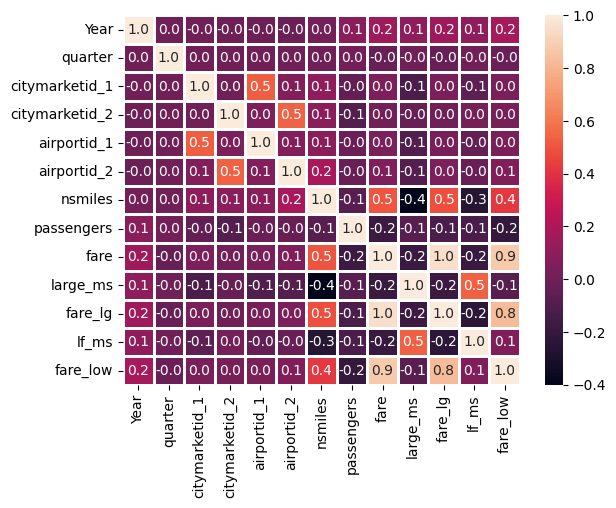

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt='.1f',linewidth=2,square=False)

In [10]:
from scipy.stats import chi2_contingency
ct = pd.crosstab(df['fare'],df['nsmiles'])
pvalue = chi2_contingency(ct)
print(ct)
print(pvalue)

nsmiles  109   115   122   129   130   133   137   145   148   155   ...  \
fare                                                                 ...   
50.00       0     0     0     0     0     0     0     0     0     0  ...   
50.40       0     0     0     0     0     0     0     0     0     0  ...   
50.41       0     0     0     0     0     0     0     0     0     0  ...   
50.50       0     0     0     0     0     0     0     0     0     0  ...   
50.72       0     0     0     0     0     0     0     0     0     0  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
2074.00     0     0     0     0     0     0     0     0     0     0  ...   
2104.90     0     0     0     0     0     0     0     0     0     0  ...   
2628.90     0     0     0     0     0     0     0     0     0     0  ...   
2716.00     0     0     0     0     0     0     0     0     0     0  ...   
3377.00     0     0     0     0     0     0     0     0     0     0  ...   

nsmiles  25

In [11]:
df = df.rename(columns={'tbl':'Table_ID','citymarketid_1':'Origin_City_ID','citymarketid_2':'Destination_City_ID','city1':'Origin_City','city2':'Destination_City','airportid_1':'Origin_Airport_ID','airportid_2':'Destination_Airport_ID','airport_1':'Origin_Airport_Code','lf_ms':'LowestCarrier_MarketShare','airport_2':'Destination_Airport_Code','nsmiles':'Distance_Btwn_Airport_Miles','carrier_lg':'Code_for_largest_carrier','fare_lg':'largest_carrier_average_fare','tbl1apk':'Route_ID'})

In [12]:
def extract_OriginCity(origincity):
    if pd.isna(origincity):
        return 'NA'
    parts = origincity.split(',')
    if len(parts)>0:
        return parts [-2].strip()
    else:
        return 'NA'
df['OriginCity'] = df['Origin_City'].apply(extract_OriginCity)
OriginCity_value_counts = df['OriginCity'].value_counts()
print(OriginCity_value_counts)

OriginCity
Los Angeles              26055
Boston                   23433
New York City            23175
Chicago                  18430
Dallas/Fort Worth        14905
                         ...  
Sioux Falls                  2
Ashland                      2
Fort Collins/Loveland        1
Belleville                   1
Bloomington/Normal           1
Name: count, Length: 140, dtype: int64


In [13]:
def extract_OriginState(originstate):
    if pd.isna(originstate):
        return 'NA'
    parts = originstate.split(',')
    if len(parts)>0:
        
        return parts [-1].strip()
    else:
        return 'NA'
df['OriginState'] = df['Origin_City'].apply(extract_OriginState)
DestinationState_value_counts = df['OriginState'].value_counts()
print(DestinationState_value_counts)

OriginState
TX                        36012
CA (Metropolitan Area)    29400
MA (Metropolitan Area)    23433
NY (Metropolitan Area)    23175
IL                        18456
OH (Metropolitan Area)     9089
FL (Metropolitan Area)     8619
OH                         8159
FL                         6786
MI                         5868
NC                         5798
NY                         5278
CO                         4916
TN                         4610
SC                         4424
GA (Metropolitan Area)     4227
MO                         3747
NV                         3488
AL                         3207
NM                         3197
WI                         2733
IN                         2621
AZ                         2362
CT                         2038
OR                         1875
AR                         1864
LA                         1862
KY                         1828
VA (Metropolitan Area)     1766
IA                         1743
CA                         1

In [14]:
def extract_DestinationCity(destinationcity):
    if pd.isna(destinationcity):
        return 'NA'
    parts = destinationcity.split(',')
    if len(parts)>0:
        return parts [-2].strip()
        
    else:
        return 'NA'
df['DestinationCity'] = df['Destination_City'].apply(extract_DestinationCity)
DestinationCity_value_counts = df['DestinationCity'].value_counts()
print(DestinationCity_value_counts)

DestinationCity
New York City     36913
Washington        31623
San Francisco     22096
Los Angeles       21475
Tampa              9267
                  ...  
Montrose/Delta        2
Vero Beach            2
Sanford               1
Fort Wayne            1
St. Cloud             1
Name: count, Length: 126, dtype: int64


In [15]:
def extract_DestinationState(destinationstate):
    if pd.isna(destinationstate):
        return 'NA'
    parts = destinationstate.split(',')
    if len(parts)>0:
        return parts [-1].strip()
    else:
        return 'NA'
df['DestinationState'] = df['Destination_City'].apply(extract_DestinationState)
DestinationState_value_counts = df['DestinationState'].value_counts()
print(DestinationState_value_counts)

DestinationState
CA (Metropolitan Area)    43571
NY (Metropolitan Area)    36913
DC (Metropolitan Area)    31623
FL (Metropolitan Area)    18058
TX                        15289
FL                        10514
AZ                         7846
CA                         6437
VA (Metropolitan Area)     5637
PA                         5392
MO                         5083
WA                         4785
OK                         4163
TN                         4082
NC                         3990
NV                         3463
OR                         3329
NY                         3177
UT                         2890
IL                         2779
MN                         2303
VA                         2287
NE                         2265
LA                         2145
WI                         1969
OH                         1787
OH (Metropolitan Area)     1690
KY                         1607
CO                         1315
MI                         1312
GA                     

In [16]:
df = df.drop(columns=['Origin_City','Destination_City','Route_ID','Table_ID'],axis=1)

In [17]:
df.dtypes

Year                              int64
quarter                           int64
Origin_City_ID                    int64
Destination_City_ID               int64
Origin_Airport_ID                 int64
Destination_Airport_ID            int64
Origin_Airport_Code              object
Destination_Airport_Code         object
Distance_Btwn_Airport_Miles       int64
passengers                        int64
fare                            float64
Code_for_largest_carrier         object
large_ms                        float64
largest_carrier_average_fare    float64
carrier_low                      object
LowestCarrier_MarketShare       float64
fare_low                        float64
Geocoded_City1                   object
Geocoded_City2                   object
OriginCity                       object
OriginState                      object
DestinationCity                  object
DestinationState                 object
dtype: object

In [18]:
X = df[['Year','quarter','Distance_Btwn_Airport_Miles','fare_low','fare','LowestCarrier_MarketShare','largest_carrier_average_fare','large_ms','passengers']]

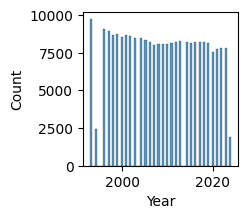

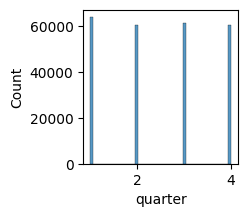

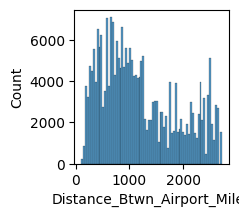

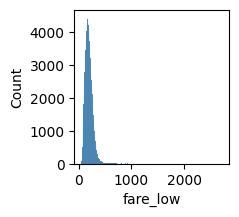

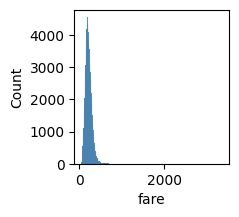

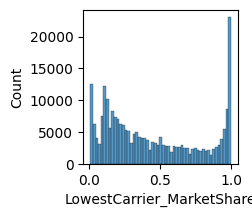

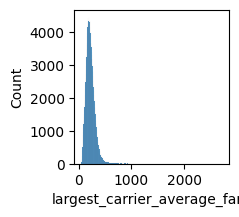

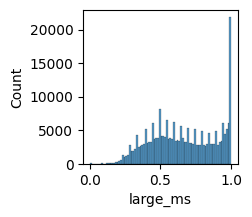

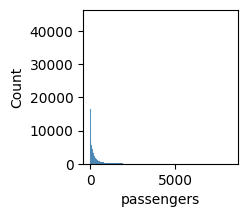

In [19]:
cols = X.columns
for columns in cols:
    fig, axs = plt.subplots(figsize=(2,2))
    sns.histplot(X[columns])

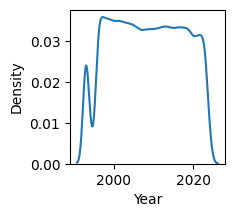

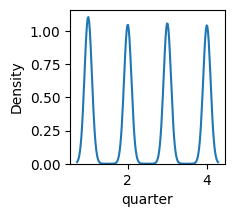

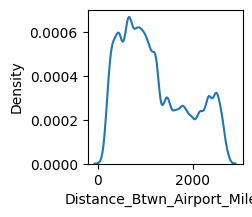

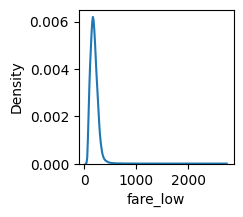

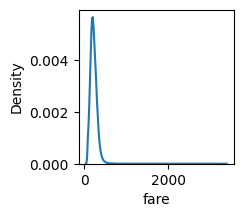

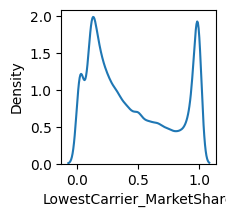

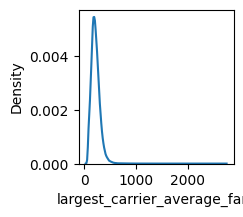

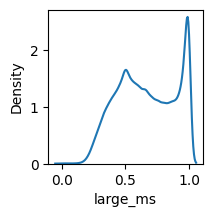

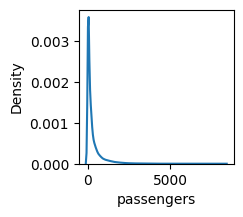

In [20]:
cols = X.columns
for columns in cols:
    fig, axs = plt.subplots(figsize=(2,2))
    sns.kdeplot(X[columns])

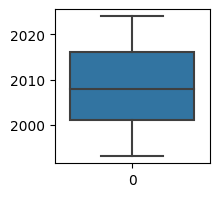

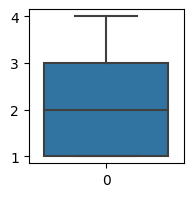

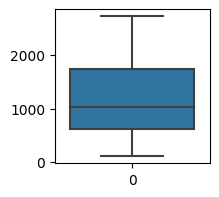

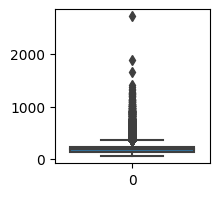

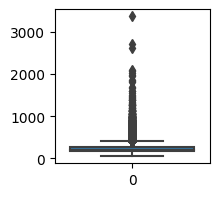

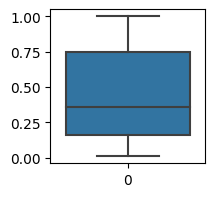

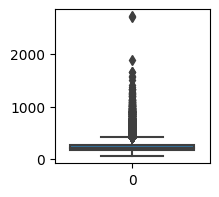

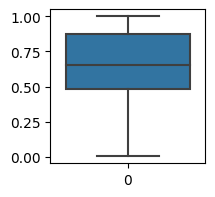

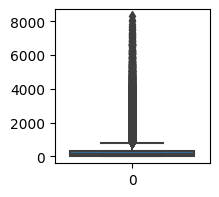

In [21]:
cols = X.columns
for columns in cols:
    fig, axs = plt.subplots(figsize=(2,2))
    sns.boxplot(X[columns])

<Axes: xlabel='DestinationCity'>

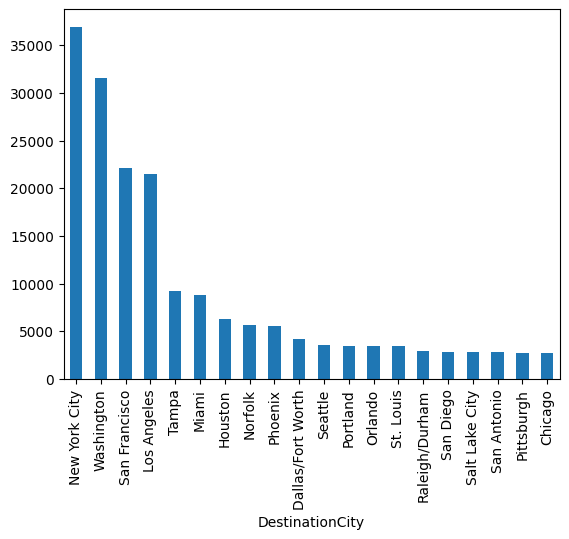

In [22]:
Top_Destination_City = df['DestinationCity'].value_counts().head(20)
Top_Destination_City.plot(kind='bar')

<Axes: xlabel='DestinationState'>

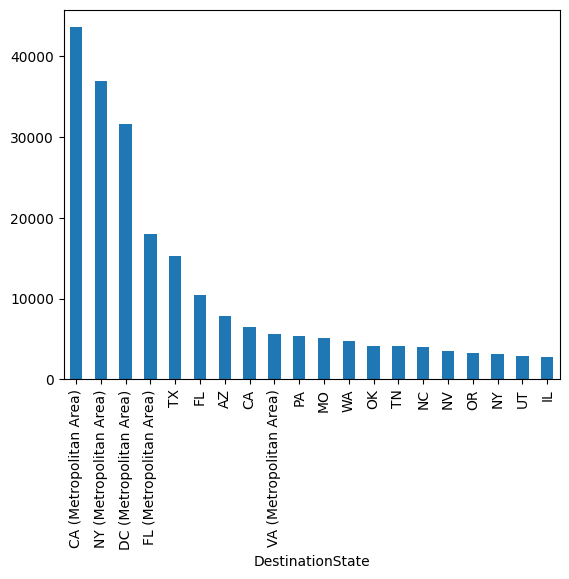

In [23]:
Top_Destination_State = df['DestinationState'].value_counts().head(20)
Top_Destination_State.plot(kind='bar')

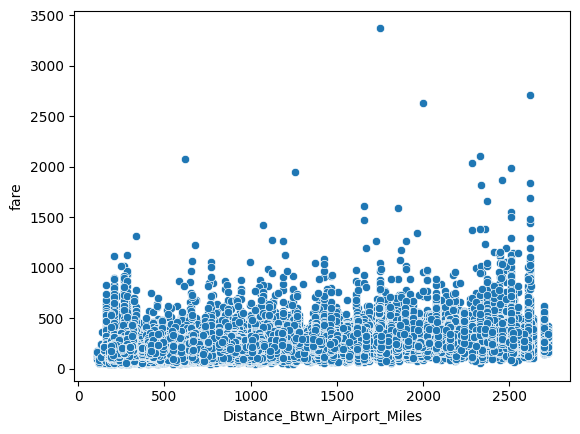

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df,y='fare',x='Distance_Btwn_Airport_Miles')
plt.show()

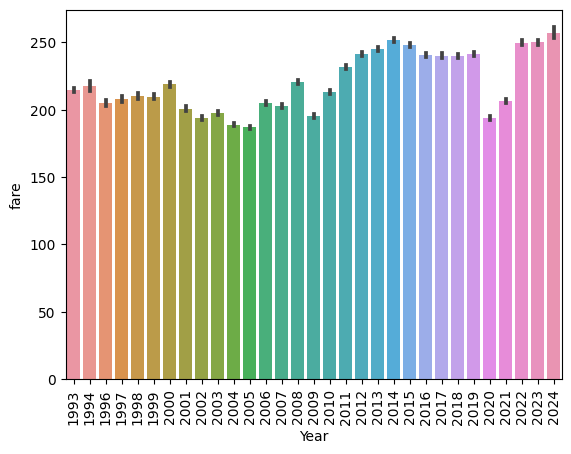

In [25]:
sns.barplot(data=df,x='Year',y='fare')
plt.xticks(rotation=90)
plt.show()

In [26]:
df.columns

Index(['Year', 'quarter', 'Origin_City_ID', 'Destination_City_ID',
       'Origin_Airport_ID', 'Destination_Airport_ID', 'Origin_Airport_Code',
       'Destination_Airport_Code', 'Distance_Btwn_Airport_Miles', 'passengers',
       'fare', 'Code_for_largest_carrier', 'large_ms',
       'largest_carrier_average_fare', 'carrier_low',
       'LowestCarrier_MarketShare', 'fare_low', 'Geocoded_City1',
       'Geocoded_City2', 'OriginCity', 'OriginState', 'DestinationCity',
       'DestinationState'],
      dtype='object')

In [27]:
Group = df.groupby('OriginCity')

In [28]:
df.groupby('OriginCity').sum()['fare'].sort_values(ascending=False)

OriginCity
Los Angeles              6182769.25
New York City            5634296.28
Boston                   5240619.41
Chicago                  3525063.32
Dallas/Fort Worth        3133749.95
                            ...    
Latrobe                      306.95
Bullhead City                261.92
Bloomington/Normal           205.45
Fort Collins/Loveland        111.80
Belleville                    72.15
Name: fare, Length: 140, dtype: float64

In [29]:
Top_cities_heighest_fare = df.groupby('OriginCity')['fare'].sum().nlargest(20).reset_index()
Top_cities_heighest_fare

,OriginCity,fare
0,Los Angeles,6182769.25
1,New York City,5634296.28
2,Boston,5240619.41
3,Chicago,3525063.32
4,Dallas/Fort Worth,3133749.95
5,Houston,2894232.00
6,Cleveland,1974225.40
7,Miami,1606435.67
8,Charlotte,871157.58
9,Atlanta,869231.65


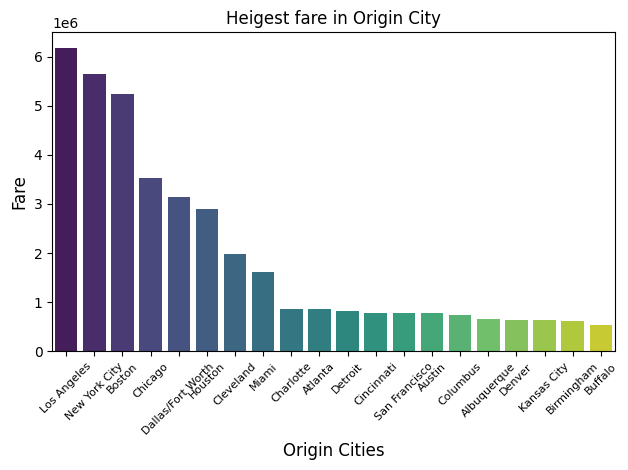

In [30]:
sns.barplot(data=Top_cities_heighest_fare, x='OriginCity',y='fare', palette='viridis')
plt.title('Heigest fare in Origin City',fontsize=12)
plt.xlabel('Origin Cities',fontsize=12)
plt.ylabel('Fare',fontsize=12)
plt.xticks(rotation=45,fontsize=8)
plt.tight_layout()
plt.show()

In [31]:
df.groupby('OriginCity').sum()['passengers'].sort_values(ascending=False)

OriginCity
Chicago              9038335
Los Angeles          8804662
Boston               6826867
New York City        5627232
Dallas/Fort Worth    5588574
                      ...   
Bullhead City            149
Augusta                  104
Montgomery                98
Sioux Falls               82
Belleville                28
Name: passengers, Length: 140, dtype: int64

array([<Axes: ylabel='passengers'>], dtype=object)

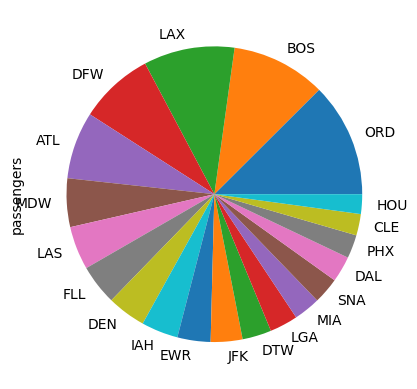

In [32]:
df.groupby('Origin_Airport_Code').sum()['passengers'].nlargest(20).sort_values(ascending=False).plot(kind='pie',subplots=True)

In [33]:
Top_busiest_airport_passengers = df.groupby('Origin_Airport_Code')['passengers'].sum().nlargest(20).reset_index()
Top_busiest_airport_passengers

,Origin_Airport_Code,passengers
0,ORD,6339800
1,BOS,5249006
2,LAX,5054697
3,DFW,4145965
4,ATL,3734532
5,MDW,2697008
6,LAS,2412409
7,FLL,2237815
8,DEN,2141167
9,IAH,2043849


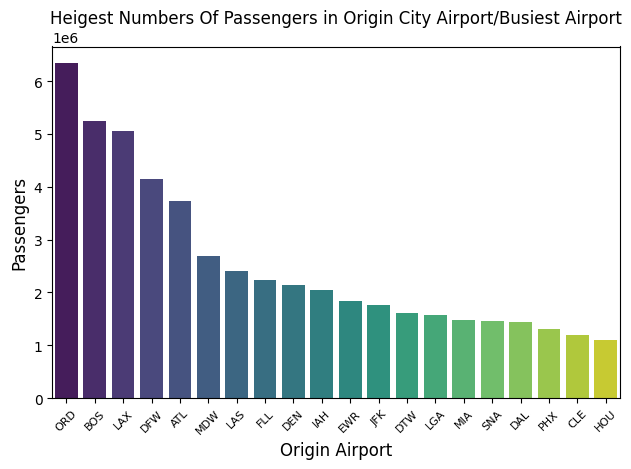

In [34]:
sns.barplot(data=Top_busiest_airport_passengers, x='Origin_Airport_Code',y='passengers', palette='viridis')
plt.title('Heigest Numbers Of Passengers in Origin City Airport/Busiest Airport',fontsize=12)
plt.xlabel('Origin Airport',fontsize=12)
plt.ylabel('Passengers',fontsize=12)
plt.xticks(rotation=45,fontsize=8)
plt.tight_layout()
plt.show()

In [35]:
heighest_fare_according_years = df.groupby('Year')['fare'].sum().nlargest(20).reset_index()
heighest_fare_according_years

,Year,fare
0,1993,2088748.96
1,2014,2070886.17
2,2013,2033014.00
3,2015,2021134.92
4,2012,1986273.39
5,2016,1979009.06
6,2017,1976474.56
7,2018,1965235.75
8,2019,1965127.63
9,2022,1949653.59


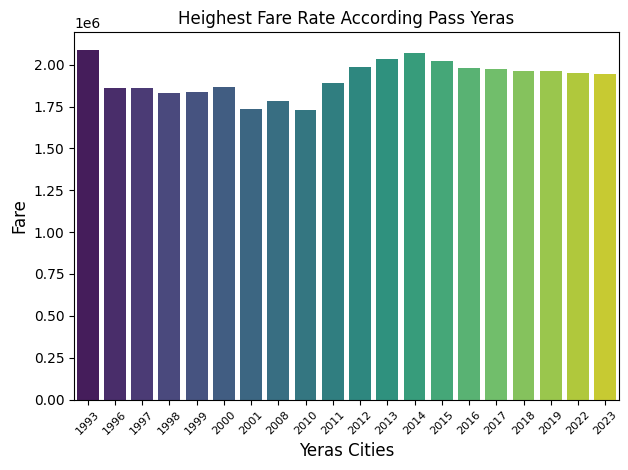

In [36]:
sns.barplot(data=heighest_fare_according_years, x='Year',y='fare', palette='viridis')
plt.title('Heighest Fare Rate According Pass Yeras',fontsize=12)
plt.xlabel('Yeras Cities',fontsize=12)
plt.ylabel('Fare',fontsize=12)
plt.xticks(rotation=45,fontsize=8)
plt.tight_layout()
plt.show()

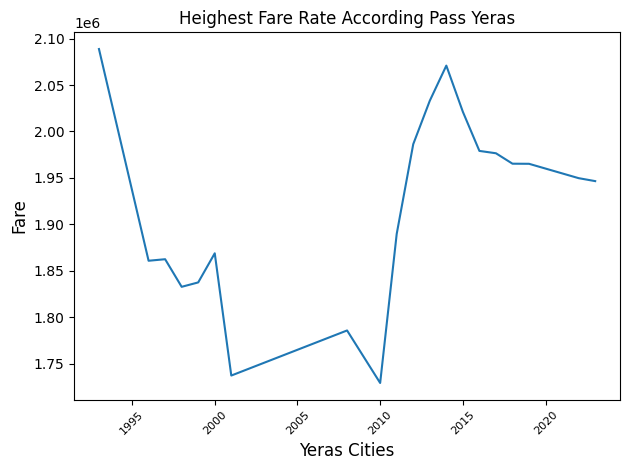

In [37]:
sns.lineplot(data=heighest_fare_according_years, x='Year',y='fare', palette='viridis')
plt.title('Heighest Fare Rate According Pass Yeras',fontsize=12)
plt.xlabel('Yeras Cities',fontsize=12)
plt.ylabel('Fare',fontsize=12)
plt.xticks(rotation=45,fontsize=8)
plt.tight_layout()
plt.show()

In [38]:
#CORRELATION BETWEEN FARE AND MILES BETWEEN ORIGIN AND DESTINATION CITIES
correlation = df['fare'].corr(df['Distance_Btwn_Airport_Miles'])
print(f'correlation between fare and miles: {correlation:.2f}')

correlation between fare and miles: 0.50


In [39]:
df.columns

Index(['Year', 'quarter', 'Origin_City_ID', 'Destination_City_ID',
       'Origin_Airport_ID', 'Destination_Airport_ID', 'Origin_Airport_Code',
       'Destination_Airport_Code', 'Distance_Btwn_Airport_Miles', 'passengers',
       'fare', 'Code_for_largest_carrier', 'large_ms',
       'largest_carrier_average_fare', 'carrier_low',
       'LowestCarrier_MarketShare', 'fare_low', 'Geocoded_City1',
       'Geocoded_City2', 'OriginCity', 'OriginState', 'DestinationCity',
       'DestinationState'],
      dtype='object')

In [40]:
import plotly.express as px
highest_fare = df.sort_values(by=['Year','fare'],ascending=False)
highest_fare = highest_fare.head(9)
print(highest_fare['DestinationCity'])

245595    New York City
245684          Norfolk
244463      Los Angeles
244622      Los Angeles
245665          Medford
244263    New York City
244711    New York City
244626      Los Angeles
244265    New York City
Name: DestinationCity, dtype: object


In [41]:
Group = df.groupby('DestinationCity')

In [42]:
Average_fare = df.groupby(['OriginCity' , 'DestinationCity'])['fare'].mean().nlargest(20).reset_index()
Average_fare

,OriginCity,DestinationCity,fare
0,Eagle,Miami,430.639667
1,Jackson,New York City,425.305878
2,Aspen,New York City,418.618156
3,Aspen,Miami,398.735000
4,El Paso,Miami,391.130000
5,Huntsville,Los Angeles,372.231333
6,Bozeman,New York City,365.010625
7,Eagle,New York City,364.070526
8,New York City,Palm Springs,355.134983
9,Chicago,Key West,349.176250


In [43]:
df.columns

Index(['Year', 'quarter', 'Origin_City_ID', 'Destination_City_ID',
       'Origin_Airport_ID', 'Destination_Airport_ID', 'Origin_Airport_Code',
       'Destination_Airport_Code', 'Distance_Btwn_Airport_Miles', 'passengers',
       'fare', 'Code_for_largest_carrier', 'large_ms',
       'largest_carrier_average_fare', 'carrier_low',
       'LowestCarrier_MarketShare', 'fare_low', 'Geocoded_City1',
       'Geocoded_City2', 'OriginCity', 'OriginState', 'DestinationCity',
       'DestinationState'],
      dtype='object')

In [44]:
df['fare'].max()

3377.0

In [45]:
data_2024 = df[(df['Year']==2024)]

In [46]:
Group.get_group('New York City')[['OriginCity','fare']]


,OriginCity,fare
15,Albuquerque,342.13
16,Albuquerque,356.92
17,Albuquerque,240.10
18,Albuquerque,251.78
19,Albuquerque,295.22
...,...,...
245857,New Orleans,216.42
245947,Knoxville,183.51
245948,Knoxville,332.42
245949,Knoxville,280.76


In [47]:
Average_fare_2024 = data_2024.groupby(['OriginCity' , 'DestinationCity'])['fare'].mean().nlargest(20).reset_index()
Average_fare_2024

,OriginCity,DestinationCity,fare
0,Aspen,New York City,633.797500
1,Eagle,Miami,576.170000
2,Jackson,New York City,549.255000
3,Eagle,New York City,542.487500
4,Bozeman,New York City,456.295000
5,Los Angeles,Norfolk,455.116250
6,Los Angeles,West Palm Beach/Palm Beach,446.598000
7,New York City,Tucson,418.170000
8,El Paso,New York City,418.100000
9,Salt Lake City,Washington,398.296667


In [48]:
fig = px.sunburst(Average_fare_2024,path=['DestinationCity','OriginCity'],values='fare')
fig.update_traces(textinfo='label + percent parent')
fig.show()

In [49]:
#MarketShare During The Years
Market_share = df.groupby('Year').sum()['large_ms'].sort_values(ascending=False)
Market_share

Year
1993    6297.8900
2017    5742.9149
2019    5735.0695
2018    5724.7734
1998    5719.6900
2016    5714.2991
1999    5704.2800
2013    5589.5200
2012    5521.4700
2021    5508.7416
2023    5499.6681
1996    5491.6826
2022    5468.3808
2002    5468.0700
2020    5452.9871
2014    5442.0900
1997    5440.1050
2001    5427.4400
2000    5426.8800
2015    5420.4000
2003    5412.0000
2004    5380.4800
2010    5378.9400
2011    5370.0400
2008    5313.5800
2009    5308.5700
2005    5291.8900
2006    5272.3600
2007    5175.0200
1994    1544.9300
2024    1353.3158
Name: large_ms, dtype: float64

In [50]:
#MarketShare During The Years
Market_share = df.groupby('Year')['large_ms'].sum().nlargest(40).reset_index()
Market_share

,Year,large_ms
0,1993,6297.8900
1,2017,5742.9149
2,2019,5735.0695
3,2018,5724.7734
4,1998,5719.6900
5,2016,5714.2991
6,1999,5704.2800
7,2013,5589.5200
8,2012,5521.4700
9,2021,5508.7416


<Axes: >

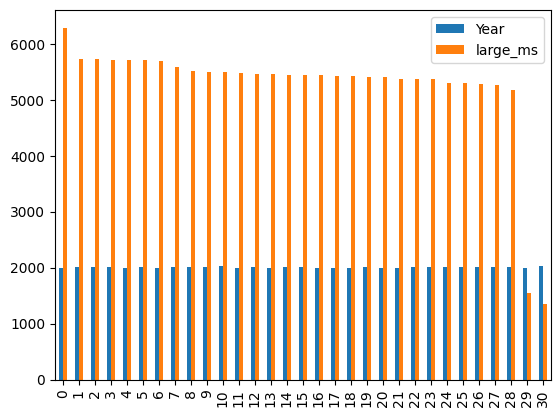

In [51]:
Market_share.plot(kind='bar')

array([<Axes: ylabel='Year'>, <Axes: ylabel='large_ms'>], dtype=object)

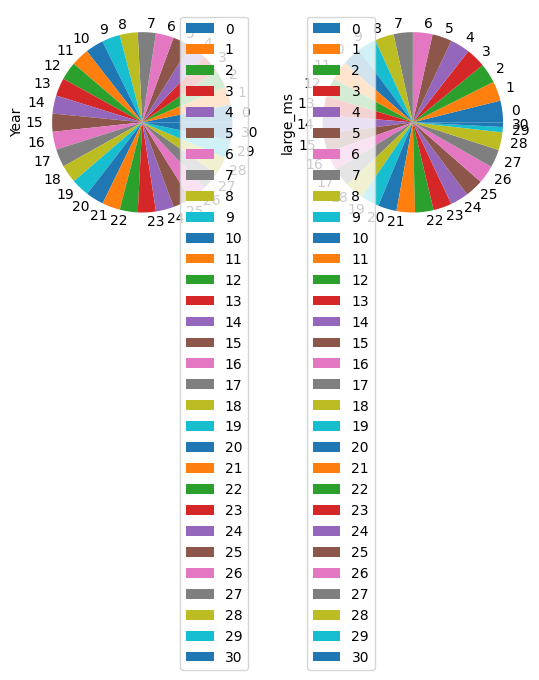

In [52]:
Market_share.plot(kind='pie',subplots=True)

In [53]:
#Which Airports has heighest Numbers Of Routes
Top_Airport_Origin = df['Origin_Airport_Code'].value_counts().head(20)

In [54]:
Most_Origin_Airport_Routes = df['Origin_Airport_Code'].value_counts().head(30)

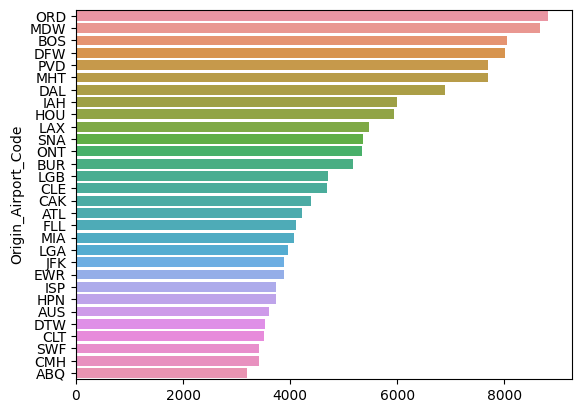

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=Most_Origin_Airport_Routes.values,y=Most_Origin_Airport_Routes.index)
plt.show()

In [56]:
Cities_With_Highest_Fares = df.groupby(['OriginCity','DestinationCity'])['fare'].sum().sort_values(ascending=False)
Cities_With_Highest_Fares

OriginCity     DestinationCity     
Los Angeles    New York City           1015341.74
New York City  San Francisco            696246.86
Los Angeles    Washington               515083.22
Boston         Los Angeles              491001.80
New York City  Washington               402768.25
                                          ...    
Phoenix        St. Cloud                    97.39
Columbus       Punta Gorda                  90.31
Boston         Punta Gorda                  89.94
Fargo          Minneapolis/St. Paul         84.45
Belleville     Tampa                        72.15
Name: fare, Length: 1259, dtype: float64

<Axes: xlabel='Year'>

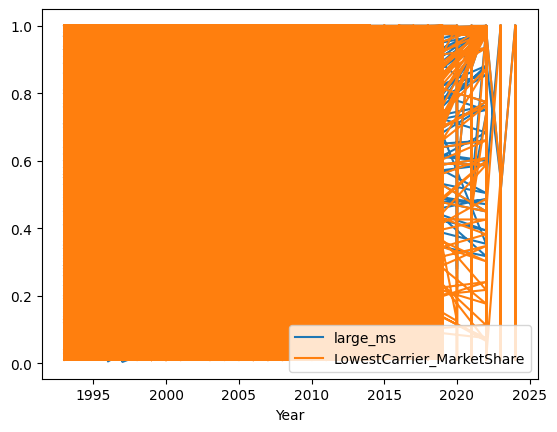

In [57]:
df.plot('Year',['large_ms','LowestCarrier_MarketShare'],secondary_y='fare')

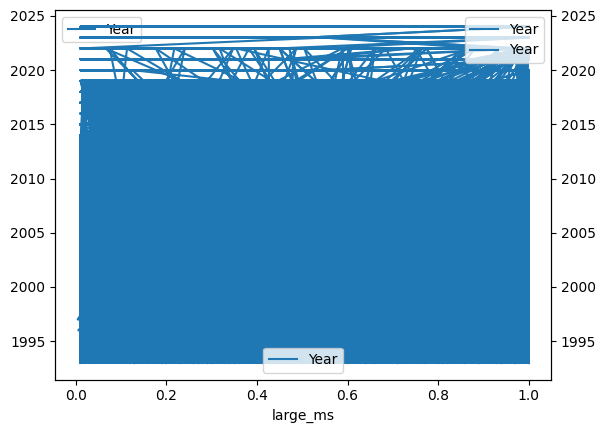

In [58]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

df.plot(x='large_ms',y=['Year'],ax=ax)
df.plot(x='LowestCarrier_MarketShare',y=['Year'],ax=ax2)
fig.legend(loc='upper right',bbox_to_anchor=(1,1),bbox_transform=ax.transAxes)
plt.show()

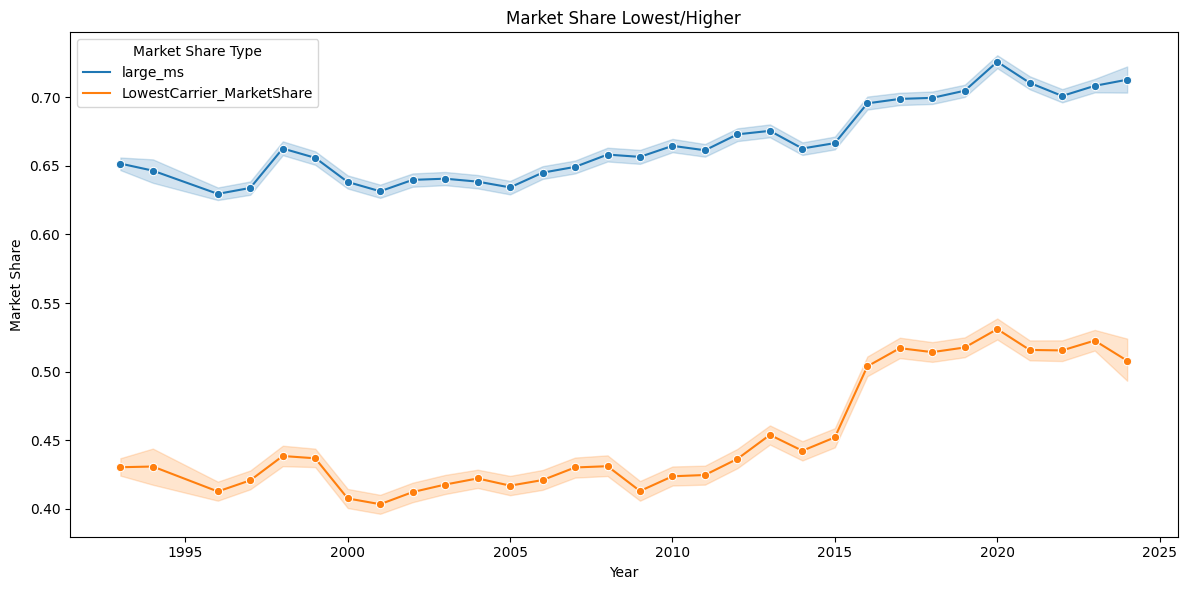

In [59]:
df_melted = df.melt(id_vars='Year',value_vars=['large_ms','LowestCarrier_MarketShare'],var_name='Market Share Type',value_name='Market Share')
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted,x='Year',y='Market Share',hue='Market Share Type',marker='o')
plt.title('Market Share Lowest/Higher')
plt.tight_layout()
plt.show()

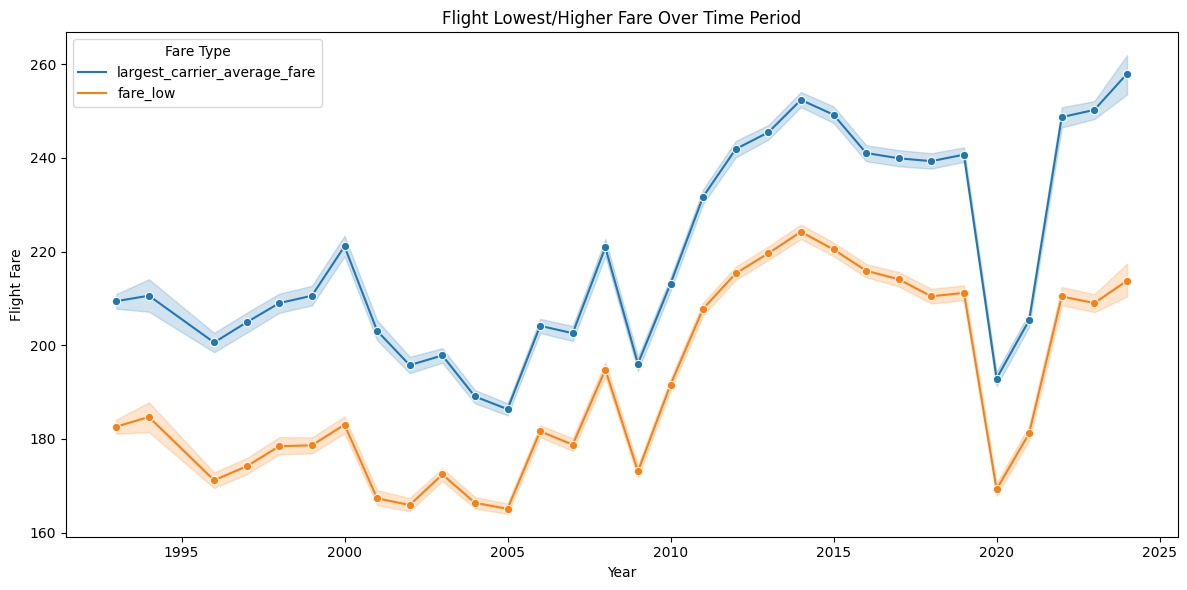

In [60]:
df1_melted = df.melt(id_vars='Year',value_vars=['largest_carrier_average_fare','fare_low'],var_name='Fare Type',value_name='Flight Fare')
plt.figure(figsize=(12, 6))
sns.lineplot(data=df1_melted,x='Year',y='Flight Fare',hue='Fare Type',marker='o')
plt.title('Flight Lowest/Higher Fare Over Time Period')
plt.tight_layout()
plt.show()

In [61]:
df['DestinationCity'].value_counts().tail(75)

DestinationCity
Hartford          629
Cincinnati        597
Wichita           590
Midland/Odessa    523
Lubbock           508
                 ... 
Montrose/Delta      2
Vero Beach          2
Sanford             1
Fort Wayne          1
St. Cloud           1
Name: count, Length: 75, dtype: int64

In [62]:
df_new = df[['Year','quarter','Origin_City_ID','passengers','fare','large_ms','OriginCity','OriginState','Origin_Airport_Code']]

In [63]:
import plotly.express as go
df_new['Year'] = pd.to_datetime(df_new['Year'])
df_new['Year'] = df_new['Year'].dt.year
df_new = df.sort_values(by=['Year'])
df_new

,Year,quarter,Origin_City_ID,Destination_City_ID,Origin_Airport_ID,Destination_Airport_ID,Origin_Airport_Code,Destination_Airport_Code,Distance_Btwn_Airport_Miles,passengers,...,largest_carrier_average_fare,carrier_low,LowestCarrier_MarketShare,fare_low,Geocoded_City1,Geocoded_City2,OriginCity,OriginState,DestinationCity,DestinationState
118285,1993,2,32575,34653,13891,15370,ONT,TUL,1283,119,...,134.39,WN,0.5700,134.39,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","Tulsa, OK\n(61.096484, -160.967455)",Los Angeles,CA (Metropolitan Area),Tulsa,OK
28115,1993,1,30189,31703,11109,12953,COS,LGA,1678,33,...,303.00,DL,0.1100,220.83,"Colorado Springs, CO\n(38.835224, -104.819798)","New York City, NY (Metropolitan Area)\n(40.123...",Colorado Springs,CO,New York City,NY (Metropolitan Area)
123814,1993,3,32575,30436,12892,15376,LAX,TUS,453,312,...,152.63,HP,0.2900,123.85,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","Tucson, AZ\n(35.167852, -103.726151)",Los Angeles,CA (Metropolitan Area),Tucson,AZ
8003,1993,2,31453,30466,12266,14107,IAH,PHX,1028,239,...,163.34,HP,0.3200,156.86,"Houston, TX\n(29.760803, -95.369506)","Phoenix, AZ\n(30.406931, -87.217578)",Houston,TX,Phoenix,AZ
57952,1993,3,30977,33570,13232,14679,MDW,SAN,1729,103,...,183.67,WN,0.8300,183.67,"Chicago, IL\n(41.775002, -87.696388)","San Diego, CA\n(32.71576, -117.163817)",Chicago,IL,San Diego,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244678,2024,1,30721,34685,13296,14685,MHT,SAV,917,12,...,260.38,WN,0.4906,260.38,NaN,NaN,Boston,MA (Metropolitan Area),Savannah,GA
244677,2024,1,30721,34685,10721,14685,BOS,SAV,917,344,...,228.61,B6,0.6676,228.61,NaN,NaN,Boston,MA (Metropolitan Area),Savannah,GA
244676,2024,1,30721,34614,14307,14869,PVD,SLC,2105,28,...,296.68,WN,0.3937,296.68,NaN,NaN,Boston,MA (Metropolitan Area),Salt Lake City,UT
244688,2024,1,30785,31703,10785,12953,BTV,LGA,266,68,...,286.25,AA,0.0258,159.16,NaN,NaN,Burlington,VT,New York City,NY (Metropolitan Area)


In [64]:
df= df[df['Year']>1994]
DepartureCity = df[['OriginCity','Origin_Airport_Code']]
DepartureCity

,OriginCity,Origin_Airport_Code
0,Allentown/Bethlehem/Easton,ABE
1,Allentown/Bethlehem/Easton,ABE
2,Albuquerque,ABQ
3,Albuquerque,ABQ
4,Albuquerque,ABQ
...,...,...
245950,Knoxville,TYS
245951,Knoxville,TYS
245952,Knoxville,TYS
245953,Knoxville,TYS


In [65]:
df_final - pd.merge(df_new,DepartureCity,left_on='Origin_City_ID',right_on='Origin_Airport_Code',how='left')
df_final = df_final.iloc[:,:-1]
df_f

NameError: name 'df_final' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('fare',axis=1),df['fare'],test_size=0.2,random_state=42)

In [ ]:
USAirline_Fares = df[['Year','quarter','OriginCity','DestinationCity','Origin_Airport_ID','Destination_Airport_ID','Distance_Btwn_Airport_Miles','passengers','fare','large_ms','largest_carrier_average_fare']]
USAirline_Fares

In [ ]:
USAirline_Fares.isnull().mean()*100

In [ ]:
USAirline_Fares.dtypes

In [ ]:
USAirline_Fares['OriginCity'].value_counts(20)

In [ ]:
USAirline_Fares['largest_carrier_average_fare'].mean()

In [ ]:
USAirline_Fares['large_ms'] = USAirline_Fares['large_ms'].fillna(0.66525163)

In [ ]:
USAirline_Fares['largest_carrier_average_fare'] = USAirline_Fares['largest_carrier_average_fare'].fillna(218.71096)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(USAirline_Fares.drop('fare',axis=1),USAirline_Fares['fare'],test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
oe = OneHotEncoder(drop='first',sparse_output=False)
X_train_OHE = oe.fit_transform(X_train[['OriginCity','DestinationCity']])
X_test_OHE = oe.transform(X_test[['OriginCity','DestinationCity']])

In [ ]:
X_train_RD = X_train.drop(columns=['OriginCity','DestinationCity']).values
X_test_Rd = X_test.drop(columns=['OriginCity','DestinationCity']).values

In [ ]:
X_train_new = np.concatenate((X_train_OHE,X_train_RD),axis=1)
X_test_new = np.concatenate((X_test_OHE,X_test_Rd),axis=1)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_new,y_train)

In [ ]:
y_pred = lr.predict(X_test_new)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math
from math import sqrt

In [ ]:
print('MSE',mean_squared_error(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MASE',sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score',r2_score(y_test,y_pred))

In [ ]:
r2 = r2_score(y_test,y_pred)
r2

In [ ]:
n = X_test.shape[0]
p = X_test.shape[1]

In [ ]:
R2 = 1-((1-r2)*(n-1)/(n-1-p))
R2

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure()
sns.regplot(x=y_test,y=y_pred,ci=68,fit_reg=True,scatter_kws={'color':'red'},line_kws={'color':'blue'})
plt.title('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(criterion='squared_error',max_depth=8)
DT.fit(X_train_new,y_train)

In [ ]:
y_pred1 = DT.predict(X_test_new)

In [ ]:
r2_score(y_test,y_pred1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=20,criterion='squared_error',max_depth=8)
rfr.fit(X_train_new,y_train)

In [ ]:
y_pred2 = rfr.predict(X_test_new)

In [ ]:
r2_score(y_test,y_pred2)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor(loss='squared_error',criterion='squared_error',n_estimators=20,max_depth=8)
GB.fit(X_train_new,y_train)


In [ ]:
y_pred3 = GB.predict(X_test_new)

In [ ]:
r2_score(y_test,y_pred3)

In [ ]:
import xgboost as xg
XG = XGBoostRegressor()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
trf1 = ColumnTransformer([
    ('ohe',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),['OriginCity','DestinationCity'])
],remainder='passthrough')
Random = RandomForestRegressor(criterion='squared_error',n_estimators=20,max_depth=8)
London_AirlineFarePipeline = Pipeline(steps=[
    ('trf1',trf1),
    ('Random',Random)
])

In [ ]:
London_AirlineFarePipeline

In [ ]:
London_AirlineFarePipeline.fit(X_train,y_train)

In [ ]:
predictions = London_AirlineFarePipeline.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

In [ ]:
import pickle
pickle.dump(USA_AirlineFarePipeline,open('London_AirlineFarePipeline.pkl','wb'))
pickle.dump(USAirline_Fares,open('USAirline_Fares.pkl','wb'))

In [ ]:
from IPython.display import FileLink
FileLink('London_AirlineFarePipeline.pkl')

In [ ]:
FileLink('USAirline_Fares.pkl')

In [ ]:
pip install plotly

In [ ]:
pip install "notebook>=5.3" "ipywidgets">=7.5

In [ ]:
import plotly.offline as pyo
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objects as go
from plotly.graph_objs import scatter
pyo.init_notebook_mode()

In [ ]:
import plotly.io as pio
pio.renderers.default = 'iframe'


In [ ]:
df['Year'] = pd.to_datetime(df['Year'])
df['Year'] = df['Year'].dt.year

In [ ]:
figure = px.scatter(data_frame=df,x='Destination_City_ID',y='fare',size='Year')
figure.show()

In [ ]:
id_vars=['Year']
id_vars

In [ ]:
df['Year'].value_counts()

In [ ]:
years

In [ ]:
df = df[['Year','DestinationCity','OriginCity','fare']]
df

In [ ]:
df['Year'] = df['Year'].astype(str)

In [ ]:
indices= ['DestinationCity','OriginCity','fare']
df1 = pd.melt(df,id_vars=['Year'],value_vars=indices)
df1.columns = ['Year','index_symbol','value']
years = df.Year.unique().tolist()
titles =[]
xaxis_titles = []

for year in years:
    df_year = df1[df1['Year']==year]
    if titles:
        fig_temp = px.histogram(df_year,x="value",color = "index_symbol")
        fig.add_traces(fig_temp.data)
    else:
        fig = px.histogram(df_year,x="value",color="index_symbol")
        
    titles +=[year]
    xaxis_titles += ['']

print(len(fig.data))

def get_visible(idx):
    visibles = [False] * len(fig.data)
    for vis_idx in range(idx*len(indices),idx*len(indices)+len(indices)):
        visibles[vis_idx] = True
    return visibles
    
fig.update_traces(dict(visible=False))
for vis_idx in range(0, len(indices)):
    fig.data[vis_idx].visible=True

buttons = [ dict(label=titles[idx],method="update",args=[{"visible":get_visible(idx)},{"title":titles[idx],"xaxis":{"title":xaxis_titles[idx]}}]) for idx,data in enumerate(years)]

fig.update_layout(
    updatemenus=[

        dict(
            active=0,
            buttons = list(buttons),
        )
        
    ])
fig.update_layout(title_text=titles[0],xaxis=dict(title=xaxis_titles[0]))

In [ ]:
data = df.groupby(['Year','DestinationCity','fare'])['OriginCity'].size().to_frame(name='OriginCity').reset_index()
fig = go.Figure()
fig.add_trace(go.Histogram(x=df.fare,
                           y=df.passengers,
                           #colorscale=df.Year,
                           visible=True)
             )
updatemenu = []
buttons = []
buttons1 = []

for col,col1 in zip(list(df.Year.unique()),list(df.DestinationCity.unique())):
    buttons.append(dict(method='restyle',
                       label = col,
                       visible=True,
                           args=[{'y':[df[(df.Year==col)]['fare']],
                                  'x':[df[(df.Year==col)].OriginCity],
                              'type':'histrogram'}
                             
                               ],
                       )
                  )
    buttons1.append(dict(method='restyle',
                       label = col1,
                       visible=True,
                           args=[{'y':[df[(df.DestinationCity==col1)]['fare']],
                                  'x':[df[(df.DestinationCity==col1)].OriginCity],
                              'type':'histogram'}
                            
                                ],
                       )
                   )
updatemenu = []
your_menu = dict()
updatemenu.append(your_menu)
updatemenu.append(dict())
updatemenu[0]['buttons'] = buttons
updatemenu[0]['direction'] = 'down'
updatemenu[0]['showactive'] = True
updatemenu[0]['x'] = 0.1
updatemenu[1]['buttons'] = buttons1
updatemenu[1]['direction'] = 'down'
updatemenu[1]['showactive'] = True
updatemenu[1]['x'] = 0.5

fig.update_layout(showlegend=False,updatemenus=updatemenu)
fig.show()



In [ ]:

df['Year'] = df['Year'].astype('str')

In [ ]:
data = df.groupby(['Year','OriginCity','DestinationCity','fare'])['large_ms'].size().to_frame(name='passengers').reset_index()
fig = go.Figure()
fig.add_trace(go.Histogram(x=df.Year,
                           y=df.fare,
                           #colorscale=df.Year,
                           visible=True)
             )
updatemenu = []
buttons = []
buttons1 = []
buttons2 = []

for col,col1 in zip(list(df.OriginCity.unique()),list(df.DestinationCity.unique())):
    buttons.append(dict(method='restyle',
                       label = col,
                       visible=True,
                           args=[{'y':[df[(df.OriginCity==col)]['fare']],
                                  'x':[df[(df.OriginCity==col)].Year],
                              'type':'histogram'}
                             
                               ],
                       )
                  )
    buttons1.append(dict(method='restyle',
                       label = col1,
                       visible=True,
                           args=[{'y':[df[(df.DestinationCity==col1)]['fare']],
                                  'x':[df[(df.DestinationCity==col1)].Year],
                              'type':'histogram'}
                            
                                ],
                       )
                   )

updatemenu = []
your_menu = dict()
updatemenu.append(your_menu)
updatemenu.append(dict())
updatemenu[0]['buttons'] = buttons
updatemenu[0]['direction'] = 'down'
updatemenu[0]['showactive'] = True
updatemenu[0]['x'] = 0
updatemenu[1]['buttons'] = buttons1
updatemenu[1]['direction'] = 'down'
updatemenu[1]['showactive'] = True
updatemenu[1]['x'] = 1
fig.update_layout(showlegend=True,updatemenus=updatemenu)
fig.show()



In [ ]:
%matplotlib inline
df['Year'] = pd.to_datetime(df['Year'])
df['Year'] = df['Year'].dt.year

In [ ]:
fig = px.scatter(df,x='Destination_City_ID',y='fare',animation_frame='Year',animation_group='Origin_City_ID',size='passengers',color='large_ms',hover_name='Origin_City_ID',log_x=True,size_max=105,range_x=[200,150000],range_y=[10,200])
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 700
fig.show()

In [ ]:
pip install numpy scipy matplotlib ipython jupyter pandas sympy nose

In [ ]:
%matplotlib notebook

In [ ]:
fig = px.sunburst(df,path=['Year','fare'],values='large_ms')
fig.update_traces(textinfo='label+percent parent')
fig.show()